<a href="https://colab.research.google.com/github/SarvaniAnkala/Soft-computing/blob/main/Mobile_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Problem Statement: Overfitting and Underfitting Analysis using
Regression/Classification Models
In this task, you are required to perform a detailed analysis of overfitting and underfitting
issues using various regression/classification models on multiple datasets. The steps to
be followed are:
a. Dataset Selection and Preparation:
- Download the following datasets:
- Mobile Price Classification Dataset
- Housing Price Dataset
- Melbourne Housing Snapshot Dataset
- Analyze the features of each dataset and choose the relevant attributes for
prediction or classification tasks.

b. Data Preprocessing:
- Handle missing values in the datasets using appropriate imputation techniques.
- Normalize the datasets if necessary to ensure the features are on a similar scale.
c. Model Development:
- Split each dataset into training and testing sets. You may use techniques like
stratified k-fold cross-validation to ensure a balanced split.
- Develop regression models (e.g., linear regression, multiple regression) or classifier
models to predict the target variable.
- For each model, estimate the parameters and generate predictions on both training
and testing sets.
d. Overfitting/Underfitting Analysis:
- Plot the training and validation loss curves to visualize and identify overfitting or
underfitting scenarios.
- Evaluate the models using metrics such as Mean Squared Error (MSE) and R2 score
on both training and testing sets.
- Compare the performance of diTerent models and discuss the observations related
to overfitting and underfitting.
e. Reporting:
- Summarize the results and insights from your analysis.
- Highlight any patterns or trends observed during the study.
- Provide recommendations for improving model performance and addressing
overfitting or underfitting issues.
By conducting this comprehensive analysis, you will gain a deeper understanding of
how diTerent regression models perform on various datasets and the common pitfalls
associated with overfitting and underfitting in machine learning.






Mobile Pricing DataSet

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check the first few rows to understand the structure
train_data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

<Axes: ylabel='count'>

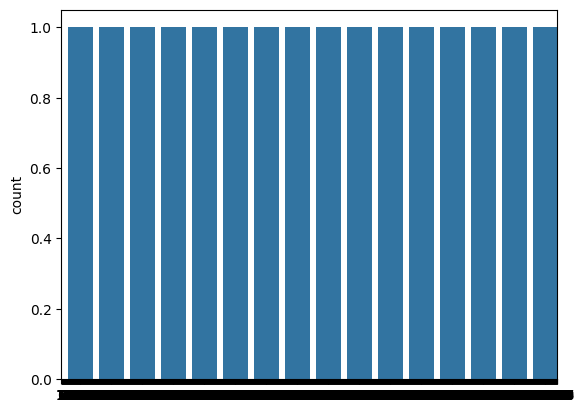

In [6]:
sns.countplot(train_data['price_range'])

In [7]:
train_data.shape

(2000, 21)

In [8]:
test_data.shape

(1000, 21)

In [9]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
# Separate features and target variable
X = train_data.drop(columns=['price_range'])  # Features
Y = train_data['price_range']  # Target variable

In [12]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[-0.7638951 ,  1.01294087, -1.12231393, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-0.09785191,  1.01294087, -1.24355155, ...,  0.55534783,
         0.99146499,  1.00142959],
       [ 0.62915118, -0.98722446,  0.69625031, ...,  0.55534783,
         0.99146499, -0.99857245],
       ...,
       [ 1.32906098,  1.01294087, -1.24355155, ...,  0.55534783,
        -1.00860848,  1.00142959],
       [ 1.55032279, -0.98722446, -0.75860108, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-1.36672064,  1.01294087, -1.12231393, ...,  0.55534783,
        -1.00860848, -0.99857245]])

In [15]:
X_test

array([[ 0.91588842, -0.98722446,  1.18120077, ...,  0.55534783,
         0.99146499, -0.99857245],
       [-0.13171851, -0.98722446, -1.24355155, ...,  0.55534783,
        -1.00860848, -0.99857245],
       [ 1.6519226 , -0.98722446,  1.66615124, ...,  0.55534783,
         0.99146499, -0.99857245],
       ...,
       [-1.54734253,  1.01294087, -1.24355155, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-0.43426017,  1.01294087, -0.03117539, ...,  0.55534783,
        -1.00860848, -0.99857245],
       [-0.40490911,  1.01294087,  0.69625031, ...,  0.55534783,
         0.99146499, -0.99857245]])

In [16]:
#logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 1 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 3 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 1 3 1 0 0 3 0 1 0 1 2 2 3 0 2 0 1 1 3 3 0 2
 0 2 0 0 3 3 0 2 2 2 3 1 1 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 1 3 2 

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a1 = accuracy_score(Y_test,y_pred)
print('Accuracy Score:',a1)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,y_pred))
print('\nClassification Report:\n',classification_report(Y_test,y_pred))

Accuracy Score: 0.9583333333333334

Confusion Matrix:
 [[144   7   0   0]
 [  3 142   1   0]
 [  0   7 135   6]
 [  0   0   1 154]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [19]:
# training accuracy
train_accuracy = accuracy_score(Y_train, lr.predict(X_train))

# testing accuracy
test_accuracy = accuracy_score(Y_test,y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9764285714285714
Testing Accuracy: 0.9583333333333334


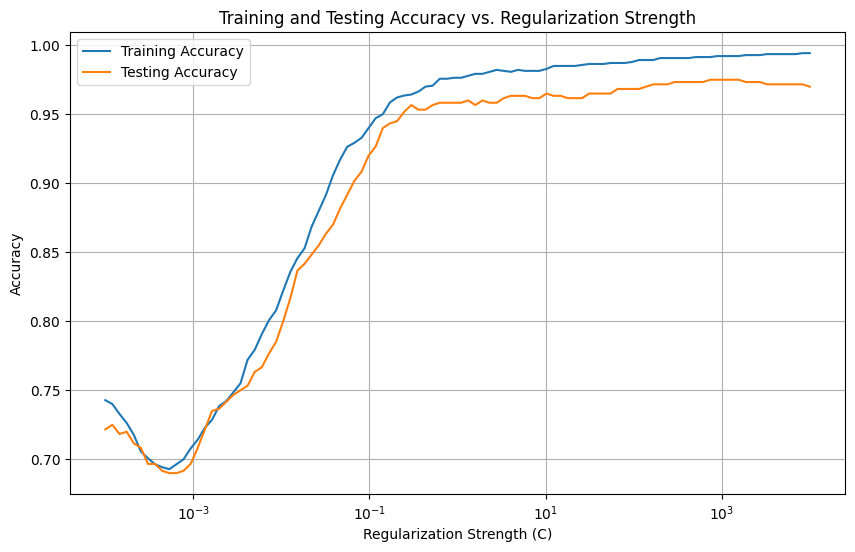

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the range of C values
C_values = np.logspace(-4, 4, 100)
train_accuracies = []
test_accuracies = []

for C in C_values:
     lr = LogisticRegression(C=C, random_state=42, max_iter=10000)
     lr.fit(X_train, Y_train)

     y_train_pred = lr.predict(X_train)
     y_test_pred = lr.predict(X_test)

     train_accuracies.append(accuracy_score(Y_train, y_train_pred))
     test_accuracies.append(accuracy_score(Y_test, y_test_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, test_accuracies, label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()
